# Logistic Regression (Part 2: Predicting loan approval based on credit score)
### About dataset
The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as credit score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.

Credit Score is a three-digit numeric summary of your credit history. Credit score can be evaluated as below:

300-499 Poor\
500-649 Average\
650-749 Good\
750-900 Excelent

### Load packages and load dataset

In [1]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math

%matplotlib inline
np.random.seed(42)

In [2]:
# import dataset
# rename the column cibil score to credit score

df = pd.read_csv('loan_approval_dataset.csv')
df.rename(columns={'cibil_score':'credit_score'}, inplace=True)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
# dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   credit_score              4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
# change categorical to numerical data
df['education'].replace([' Not Graduate', ' Graduate'], [0, 1], inplace=True)
df['self_employed'].replace([' No', ' Yes'], [0, 1], inplace=True)
df['loan_status'].replace([' Rejected', ' Approved'], [0, 1], inplace=True)

In [5]:
# vies top 5 dataset
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


### Descriptive statistics

In [6]:
# descriptive statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
education,4269.0,5.022253e-01,5.000536e-01,0.0,0.0,1.0,1.0,1.0
self_employed,4269.0,5.036308e-01,5.000454e-01,0.0,0.0,1.0,1.0,1.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
credit_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0


### Correlation between independent and dependent variables

<Axes: >

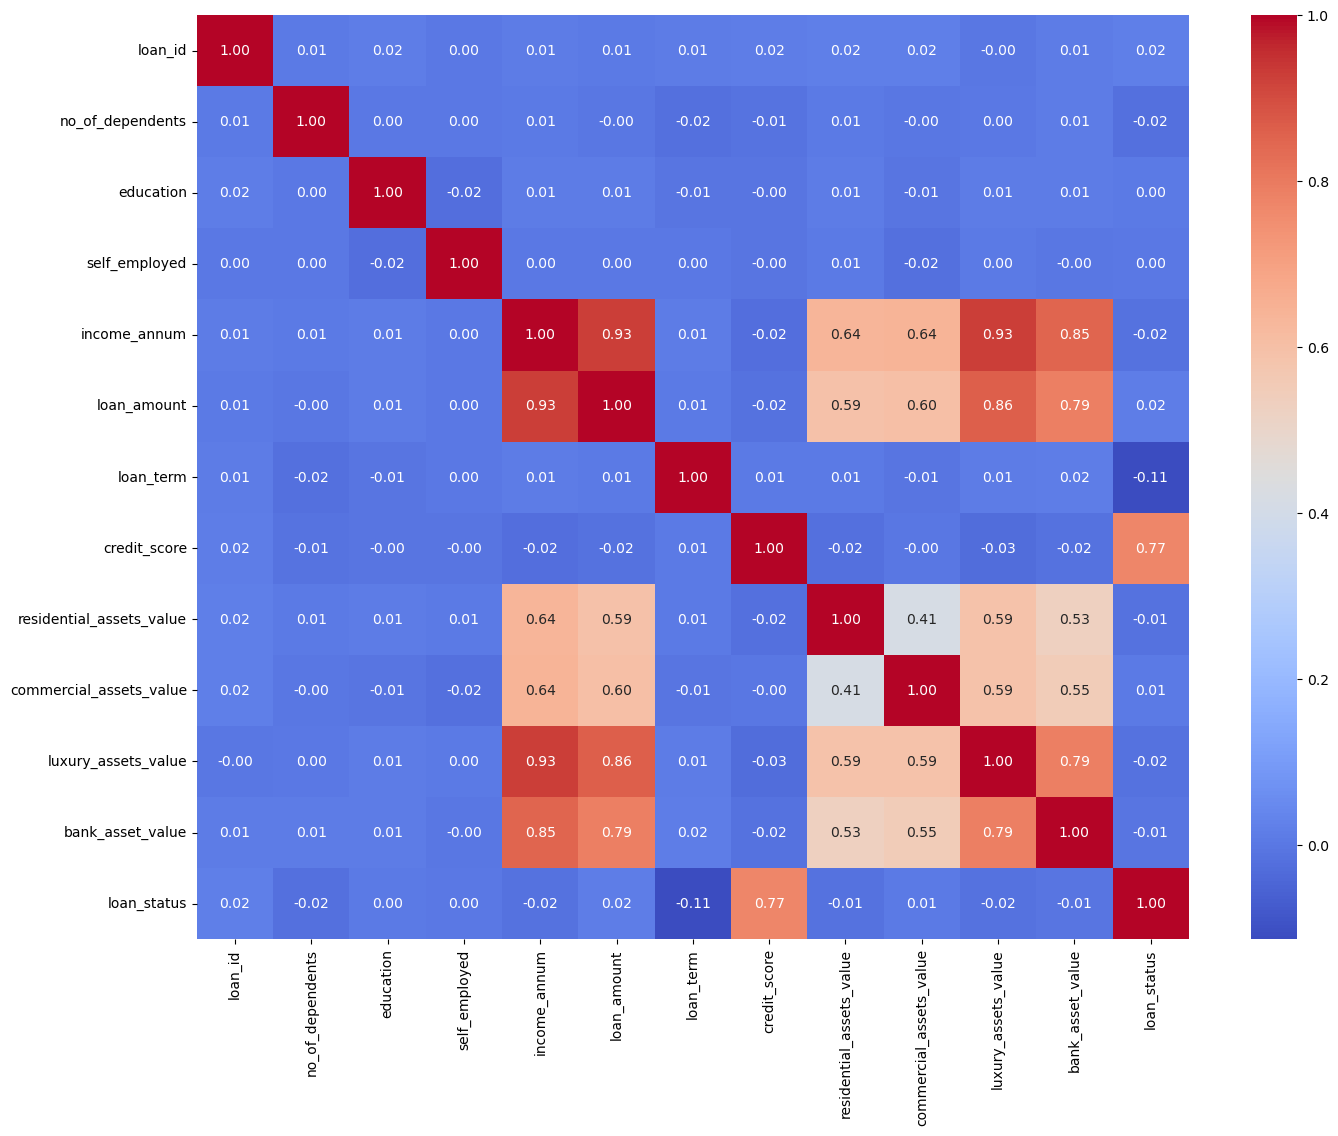

In [7]:
# seaborn heatmap
# as expected the loan approval has high correlation with credit score
plt.figure(figsize = (16,12))
sns.heatmap(data = df.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

### Logistic regression model using statsmodels

1    2656
0    1613
Name: loan_status, dtype: int64


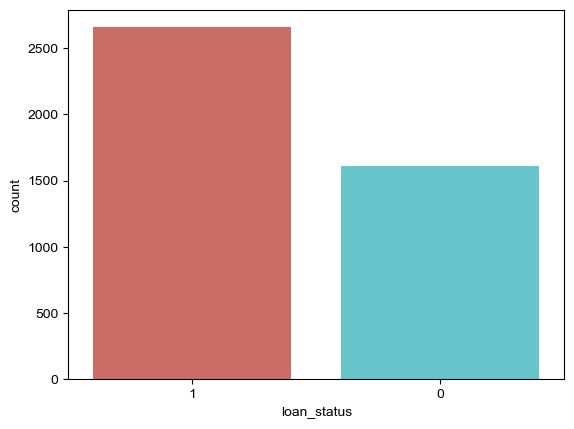

In [8]:
# count of loan approved and loan rejected
# 1 is approved and 0 is rejected

print(df['loan_status'].value_counts())

sns.countplot(x='loan_status',data = df, palette='hls',order = df['loan_status'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

In [9]:
# logistic regression
x = df['credit_score']
y = df['loan_status']
X = sm.add_constant(x)

LogisticRegr = sm.Logit(y,X)
model = LogisticRegr.fit(method = 'newton')
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.251998
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                 4269
Model:                          Logit   Df Residuals:                     4267
Method:                           MLE   Df Model:                            1
Date:                Wed, 04 Oct 2023   Pseudo R-squ.:                  0.6199
Time:                        00:12:16   Log-Likelihood:                -1075.8
converged:                       True   LL-Null:                       -2830.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -11.3542      0.368    -30.863      0.000     -12.075     -10.633
credit_score     0.0215

### Odds ratio

In [10]:
# odds ratio is the natural e to the power of parameter
odds_ratio = np.exp(model.params)

# confidence level for odds ratio
confidence_interval = np.exp(model.conf_int())

# p-value for every parameter
pvalue = model.pvalues

# odds ratio, confidence interval, and p-values
table= confidence_interval
table['Odds Ratio'] = odds_ratio
table['p-value'] = round(pvalue,4)
table.columns = ['Lower 95%', 'Upper 95%','Odds Ratio','p-value']
print(table)

              Lower 95%  Upper 95%  Odds Ratio  p-value
const          0.000006   0.000024    0.000012      0.0
credit_score   1.020393   1.023144    1.021767      0.0


### plot the logistic regression line

In [40]:
# the probability of loan approval based on credit score

credit = np.arange(400,800,20)
probability_based_credit = []

for i in credit:
    probability = math.exp(model.params.const + model.params.credit_score * i )/ ( 1 + math.exp(model.params.const + model.params.credit_score * i ))
    probability_based_credit.append(probability)

credit_table = pd.DataFrame({'Credit Score': credit, 'Probability of loan approval': probability_based_credit})
credit_table

,Credit Score,Probability of loan approval
0,400,0.060617
1,420,0.090300
2,440,0.132469
3,460,0.190213
4,480,0.265426
5,500,0.357260
6,520,0.460929
7,540,0.568093
8,560,0.669240
9,580,0.756839


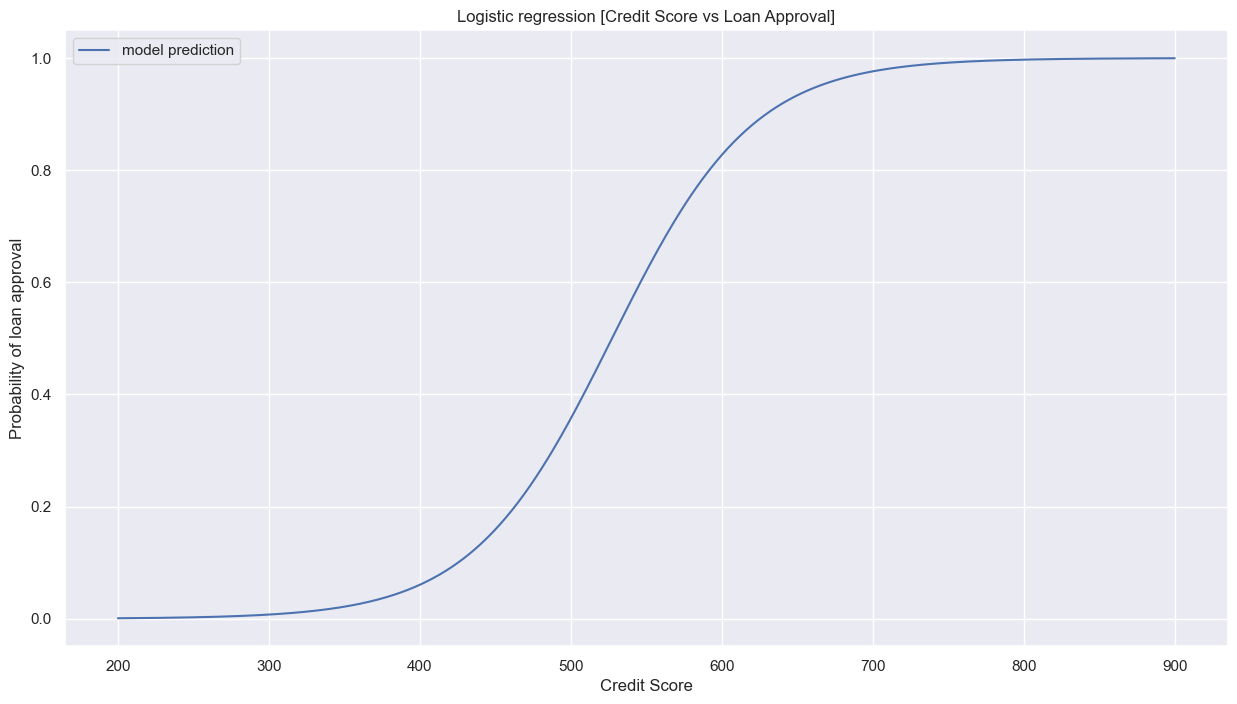

In [11]:
# graph the model prediction and data

Y = []
X = np.arange(200,900+1)

for i in X: 
        y_pred = math.exp(model.params.const + model.params.credit_score * i )/ ( 1 + math.exp(model.params.const + model.params.credit_score * i ))
        Y.append(y_pred)
        
plt.figure(figsize = (15,8))
plt.plot(X,Y, label = 'model prediction')
plt.ylabel('Probability of loan approval')
plt.xlabel('Credit Score')
plt.title('Logistic regression [Credit Score vs Loan Approval]', size = 12)
plt.legend()
plt.show()

### Model accuracy and confusion matrix

In [12]:
df['model_probability'] = model.predict()
predict = []
for i in df['model_probability']:
    if i >= 0.5:
        predict.append(1)
    else:
        predict.append(0)
df['model_prediction'] = predict

In [13]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,model_probability,model_prediction
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0.995500,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,0.085132,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0.387443,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0.214520,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,0.041956,0


Text(0.5, 1.0, 'Accuracy Score: 0.919419067697353')

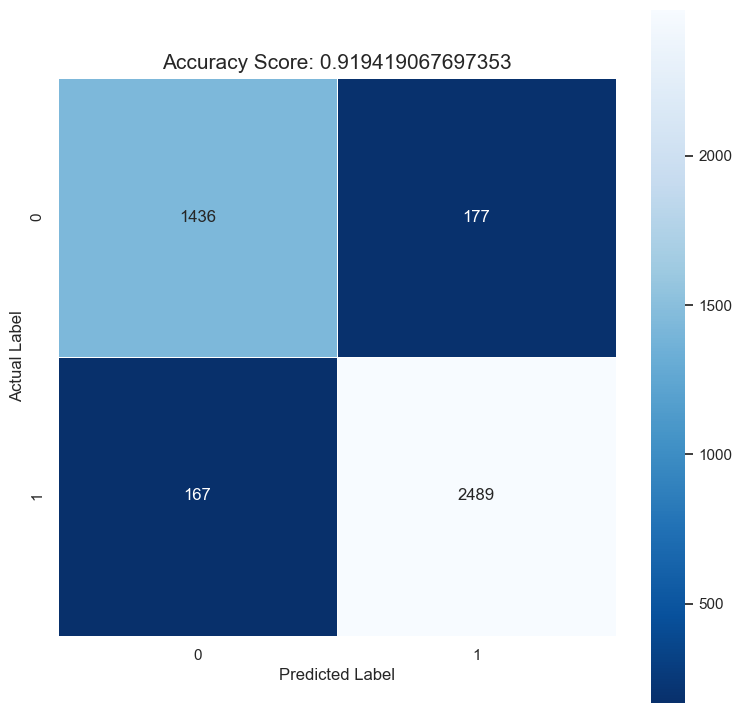

In [14]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

cm = metrics.confusion_matrix(df['loan_status'], df['model_prediction'])
plt.figure(figsize = (9,9))
sns.heatmap(cm, annot = True, fmt = ".0f", linewidth = 0.5, square = True, cmap = "Blues_r") 
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(df['loan_status'], df['model_prediction']))
plt.title(all_sample_title, size = 15)

### Even odds (borderline between approve and reject)

In [15]:
# credit score for even odds
credit_even_odds = np.round(-model.params.const / model.params.credit_score)
credit_even_odds

527.0

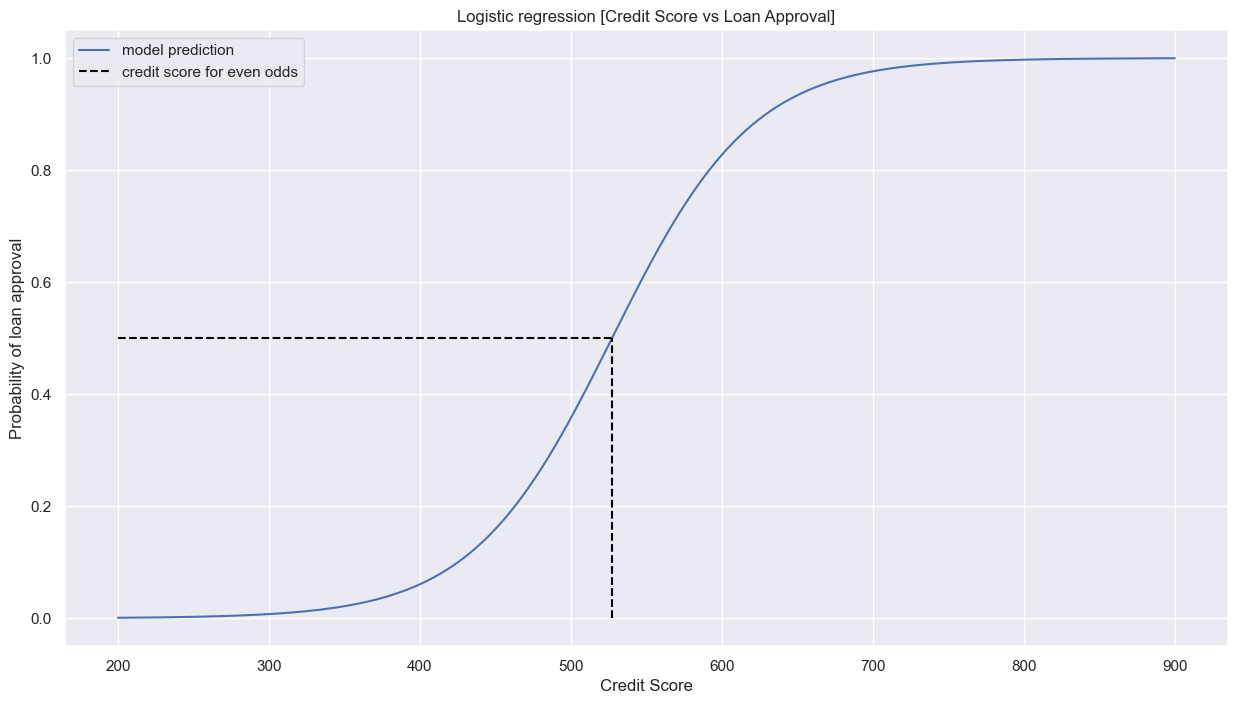

In [16]:
# graph the model prediction and data

Y = []
X = np.arange(200,900+1)

for i in X: 
        y_pred = math.exp(model.params.const + model.params.credit_score * i )/ ( 1 + math.exp(model.params.const + model.params.credit_score * i ))
        Y.append(y_pred)
        
plt.figure(figsize = (15,8))
plt.plot(X,Y, label = 'model prediction')
plt.ylabel('Probability of loan approval')
plt.xlabel('Credit Score')
plt.title('Logistic regression [Credit Score vs Loan Approval]', size = 12)
plt.plot([credit_even_odds, credit_even_odds], [0, 0.5], '--', color = 'black')
plt.plot([200, credit_even_odds], [0.5, 0.5], '--',color = 'black', label = 'credit score for even odds')
plt.legend()
plt.show()

### Meaning behind the equation and code

In [17]:
print(f'''
We are trying to estimate the probability of an event, given certain value of independent variable, 
in this case the independent variable is credit score.

Logistic regression is suitable for model prediction consisiting binary dependent variable, 
in this case the dependent variable is loan approval(approved or rejected)

Our logistic regression shows that the odds of getting loan approval 
increase by {np.round(np.exp(model.params.credit_score),4)} for one credit score increase. In percetage terms, 
the odds of getting loan approval increase 2.18% for one credit score increase.

According to our model and dataset. to have 50/50 chance of loan approbval, we must have approximately
{credit_even_odds} credit score

Our model accuracy score is {np.round(accuracy_score(df['loan_status'], df['model_prediction']),4)}.
True negative is {cm[0][0]}, true positive is {cm[1][1]}
False negative is {cm[1][0]}, false positive is {cm[0][1]}

''')


We are trying to estimate the probability of an event, given certain value of independent variable, 
in this case the independent variable is credit score.

Logistic regression is suitable for model prediction consisiting binary dependent variable, 
in this case the dependent variable is loan approval(approved or rejected)

Our logistic regression shows that the odds of getting loan approval 
increase by 1.0218 for one credit score increase. In percetage terms, 
the odds of getting loan approval increase 2.18% for one credit score increase.

According to our model and dataset. to have 50/50 chance of loan approbval, we must have approximately
527.0 credit score

Our model accuracy score is 0.9194.
True negative is 1436, true positive is 2489
False negative is 167, false positive is 177


